In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [ ]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X = X.to(device)
Y = Y.to(device)

In [ ]:
class MyNeuralNet(nn.Module):
  def __init__(self):

    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.activation = nn.ReLU()
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [ ]:
model = MyNeuralNet()
model = model.to(device)

In [ ]:
opt = SGD(model.parameters(), lr = 0.001)

In [ ]:
mse = nn.MSELoss()

In [ ]:
losses = []
for _ in range(30): # o treinamento acontecerá por 30 iterações
  opt.zero_grad() # para o treinamento, a cada iterção o gradiente retorna a zero, ao mesmo tempo que são armazenados na variável grad de um tensor(inicializada = none por padrão)
  loss_value = mse(model(X),Y)
  loss_value.backward()


  opt.step()
  losses.append(loss_value.detach().cpu().numpy())

Text(0, 0.5, 'loss value')

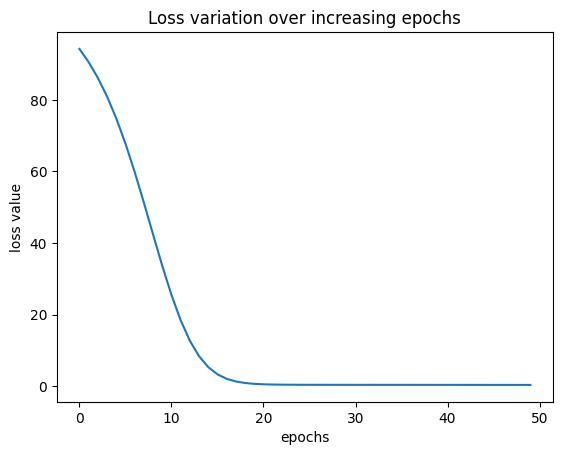

In [ ]:
plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')